In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_97a0fc81083942378cf2e26b00565e8f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='lsG0ngO478BVJSrG7S1TakL9KcsOKwXyO-9sPGZ6JK_L',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_97a0fc81083942378cf2e26b00565e8f.get_object(Bucket='employeeattrition-donotdelete-pr-lslcubwv0u4lsc',Key='EmployeeAttrition.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head()



,Education,Job Involvement,Job Level,Daily Rate (USD),Monthly Income (USD),No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Training Times Last Year,Performance Rating,Attrition (Yes/No)
0,College,High,2,1102,5993,8,8,6,4,0,5,0,Excellent,Yes
1,Below College,Medium,2,279,5130,1,10,10,7,1,7,3,Outstanding,No
2,College,Medium,1,1373,2090,6,7,0,0,0,0,3,Excellent,Yes
3,Master,High,1,1392,2909,1,8,8,7,3,0,3,Excellent,No
4,Below College,High,1,591,3468,9,6,2,2,2,2,3,Excellent,No


In [5]:
y=dataset.iloc[:,13:].values

In [6]:
y

array([['Yes'],
       ['No'],
       ['Yes'],
       ..., 
       ['No'],
       ['No'],
       ['No']], dtype=object)

In [7]:
x=dataset.iloc[:,:13].values

In [8]:
x

array([['College', 'High', 2, ..., 5, 0, 'Excellent'],
       ['Below College', 'Medium', 2, ..., 7, 3, 'Outstanding'],
       ['College', 'Medium', 1, ..., 0, 3, 'Excellent'],
       ..., 
       ['Bachelor', 'Very High', 2, ..., 3, 0, 'Outstanding'],
       ['Bachelor', 'Medium', 2, ..., 8, 3, 'Excellent'],
       ['Bachelor', 'Very High', 2, ..., 2, 3, 'Excellent']], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
lb=LabelEncoder()

In [11]:
x[:,0]=lb.fit_transform(x[:,0])
x[:,1]=lb.fit_transform(x[:,1])
x[:,12]=lb.fit_transform(x[:,12])

In [12]:
y[:,0]=lb.fit_transform(y[:,0])

In [13]:
y

array([[1],
       [0],
       [1],
       ..., 
       [0],
       [0],
       [0]], dtype=object)

In [14]:
y=y.astype('int')

In [15]:
x

array([[2, 0, 2, ..., 5, 0, 0],
       [1, 2, 2, ..., 7, 3, 1],
       [2, 2, 1, ..., 0, 3, 0],
       ..., 
       [0, 3, 2, ..., 3, 0, 1],
       [0, 2, 2, ..., 8, 3, 0],
       [0, 3, 2, ..., 2, 3, 0]], dtype=object)

In [16]:
  from sklearn.preprocessing import OneHotEncoder
oh=OneHotEncoder(categorical_features=[0])
x=oh.fit_transform(x).toarray()
x[:,1:]
oh1=OneHotEncoder(categorical_features=[1])
x=oh1.fit_transform(x).toarray()
x[:,1:]
oh2=OneHotEncoder(categorical_features=[12])
x=oh2.fit_transform(x).toarray()
x[:,1:]

array([[ 0.,  0.,  0., ...,  5.,  0.,  0.],
       [ 0.,  0.,  0., ...,  7.,  3.,  1.],
       [ 0.,  0.,  0., ...,  0.,  3.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  3.,  0.,  1.],
       [ 0.,  0.,  0., ...,  8.,  3.,  0.],
       [ 0.,  0.,  0., ...,  2.,  3.,  0.]])

In [17]:
x.shape

(1470, 54)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8)

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [20]:
x_train

array([[-0.15617376, -0.36162029, -0.31799936, ..., -0.29655437,
         0.09469488, -0.40256097],
       [-0.15617376, -0.36162029,  3.14466038, ..., -0.57599983,
        -2.22532971, -0.40256097],
       [-0.15617376, -0.36162029, -0.31799936, ..., -0.57599983,
        -0.67864665,  2.48409575],
       ..., 
       [-0.15617376, -0.36162029, -0.31799936, ..., -0.29655437,
         1.64137794, -0.40256097],
       [-0.15617376, -0.36162029, -0.31799936, ..., -1.13489075,
        -0.67864665, -0.40256097],
       [-0.15617376, -0.36162029, -0.31799936, ..., -0.57599983,
        -0.67864665,  2.48409575]])

In [21]:
y_train

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [22]:
x_test

array([[ 6.40312424, -0.36162029, -0.31799936, ..., -1.13489075,
        -0.67864665, -0.40256097],
       [-0.15617376, -0.36162029, -0.31799936, ...,  0.54178202,
         0.09469488,  2.48409575],
       [-0.15617376, -0.36162029, -0.31799936, ..., -0.01710891,
        -0.67864665, -0.40256097],
       ..., 
       [-0.15617376, -0.36162029, -0.31799936, ...,  0.82122748,
         0.86803641, -0.40256097],
       [-0.15617376, -0.36162029, -0.31799936, ...,  1.65956386,
         1.64137794, -0.40256097],
       [ 6.40312424, -0.36162029, -0.31799936, ..., -1.13489075,
        -0.67864665, -0.40256097]])

In [23]:
y_test

array([[1],
       [0],
       [0],
       ..., 
       [0],
       [0],
       [0]])

In [24]:
from sklearn.linear_model import LogisticRegression


In [25]:
lr= LogisticRegression()

In [26]:
lr.fit(x_train,y_train)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
y_predict =lr.predict(x_test)

In [28]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test,y_predict)

0.82482993197278909

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[956,  28],
       [178,  14]])

In [32]:
import sklearn.metrics as metrics
fpr,tpr,threshold = metrics.roc_curve(y_test,y_predict)
roc_auc = metrics.auc(fpr,tpr)
roc_auc

0.52223069105691067

[]

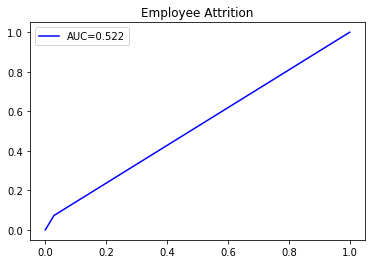

In [33]:
plt.title('Employee Attrition')
plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='Blue')
plt.legend()
plt.plot()

In [36]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [38]:
wml_credentials={"password": "d7c524a8-936f-4f1f-89c4-aa70ebbdba33",
  "url": "https://eu-gb.ml.cloud.ibm.com",
  "username": "f490d1df-2c82-4f43-abcf-0d7532580054",
"instance_id": "7be3f69f-d790-45c6-a593-3725d0baffd0",
"access_key": "QLbFZDhtxFvEBQdNXE4hGYwQLwoGRkNLIdes5S-A9oLN"
                 }
                 

In [39]:
client=WatsonMachineLearningAPIClient(wml_credentials)

In [40]:
model_props={
    client.repository.ModelMetaNames.AUTHOR_NAME:"Employee",
    client.repository.ModelMetaNames.AUTHOR_EMAIL:"employee@ibm.com",
    client.repository.ModelMetaNames.NAME:"LogisticRegression"
}

In [41]:
model_artifact=client.repository.store_model(lr,meta_props=model_props)

In [42]:
published_model_uid=client.repository.get_model_uid(model_artifact)


In [43]:
created_deployment=client.deployments.create(published_model_uid,name="LogisticRegression")



#######################################################################################

Synchronous deployment creation for uid: '47edc66e-282f-4723-863f-e1b76de2fc2f' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='9dfb1d99-b7b3-45af-ab5a-ba700166ca4f'
------------------------------------------------------------------------------------------------




In [44]:
scoring_endpoint=client.deployments.get_scoring_url(created_deployment)

In [45]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/7be3f69f-d790-45c6-a593-3725d0baffd0/deployments/9dfb1d99-b7b3-45af-ab5a-ba700166ca4f/online'